# PricePredict Debug



In [1]:
from pricepredict import PricePredict
import logging
import os
import dill

logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
# Log to a file...
logging.basicConfig(filename='dgs_pred_ui.log', level=logging.DEBUG)

def load_pp_objects():

    logger.debug("Loading PricePredict objects..,")

    sym_dpps_d_ = {}
    sym_dpps_w_ = {}

    min_dil_size = 70000
    ppo_dir = '../ppo/'

    # Find the latest .dill files in the ./ppo directory for any given symbol.
    dill_files = {}
    with os.scandir(ppo_dir) as entries:
        tot_entries = len(list(os.scandir(ppo_dir)))
        i = 0
        for entry in entries:
            if entry.is_file() and entry.name.endswith('.dill'):
                sym, period = entry.name.split('_')[:2]
                sym_period = sym + '_' + period
                # Find a key in dill_files that starts with sym and place the entry
                # the variable curr_entry.
                curr_entry = next((v for k, v in dill_files.items() if k.startswith(sym_period)), None)
                if curr_entry is not None:
                    if entry.name > curr_entry.name:
                        # Replace the entry with the newer file
                        dill_files[sym_period] = entry
                else:
                    dill_files[sym_period] = entry
            i += 1

    tot_entries = len(dill_files.keys())
    i = 0
    for sym_period in dill_files.keys():
        entry = dill_files[sym_period]
        if entry.is_file():
            sym = entry.name.split('_')[0]
            period = entry.name.split('_')[1]
            if period == 'W':
                try:
                    with open(entry, "rb") as f:
                        sym_dpps_w_[sym] = dill.load(f)
                except Exception as e:
                    logger.warning(f"Error loading PricePredict object [{sym}]: {e}")
            elif period == 'D':
                try:
                    with open(entry, "rb") as f:
                        sym_dpps_d_[sym] = dill.load(f)
                except Exception as e:
                    logger.warning(f"Error loading PricePredict object [{sym}]: {e}")
            i += 1


    return sym_dpps_d_, sym_dpps_w_


ppo_d, ppo_w = load_pp_objects()


2024-12-04 07:50:37.934821: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 07:50:37.945431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 07:50:37.956936: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 07:50:37.960226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 07:50:37.969209: I tensorflow/core/platform/cpu_feature_guar

In [15]:
slist = sorted(list(ppo_d.keys()))
slist

['000001.SS',
 'AAOI',
 'AAPL',
 'ABT',
 'ACAD',
 'ACN',
 'ADBE',
 'ADM',
 'ADP',
 'AIG',
 'ALGM',
 'ALKS',
 'ALL',
 'AMGN',
 'AMX',
 'AMZN',
 'ANTM.JK',
 'AON',
 'APD',
 'APTV',
 'ASND',
 'AVGO',
 'AXON',
 'AXP',
 'BA',
 'BB',
 'BCRX',
 'BFH',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'CAT',
 'CB',
 'CCI',
 'CI',
 'CL',
 'CMCSA',
 'CNC',
 'CNMD',
 'CRM',
 'CRSP',
 'CSCO',
 'CSX',
 'CVX',
 'DHR',
 'DIS',
 'DUK',
 'ECL',
 'EGAN',
 'EGIO',
 'EL',
 'EMR',
 'EOG',
 'ERIC',
 'EURUSD=X',
 'EXAS',
 'EXEL',
 'FOLD',
 'FSLR',
 'FXI',
 'FXP',
 'GBPUSD=X',
 'GC=F',
 'GD',
 'GE',
 'GILD',
 'GLPG',
 'GOOG',
 'HAE',
 'HD',
 'HON',
 'HUBS',
 'IART',
 'IBM',
 'IMAX',
 'INCY',
 'INTC',
 'INTU',
 'IONS',
 'IRTC',
 'IRWD',
 'ISRG',
 'ITW',
 'JAZZ',
 'JD',
 'JNJ',
 'JPM',
 'JPYUSD=X',
 'KO',
 'LDOS',
 'LIN',
 'LIVN',
 'LLY',
 'LMT',
 'LOW',
 'LRCX',
 'LSCC',
 'MA',
 'MCD',
 'MDB',
 'MDLZ',
 'MDRX',
 'MDT',
 'MDXG',
 'MEDP',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MRVL',
 'MSFT',
 'MTCH',
 'NBIX',
 'NEE',
 'NEO',
 'NF

In [9]:
from pricepredict import PricePredict
import os
import dill

ticker = 'MSFT'
trn_date_end = datetime.datetime.now() - datetime.timedelta(days=1)
trn_date_start = datetime.datetime.now() - datetime.timedelta(days=251 * 5)
prd_end = datetime.datetime.now()
prd_start = datetime.datetime.now() - datetime.timedelta(days=1000)
print(f"trh_date_start: {trn_date_start}")
print(f"trh_date_end: {trn_date_end}")

train_date_end = trn_date_end.strftime("%Y-%m-%d")
train_date_start = trn_date_start.strftime("%Y-%m-%d")
pred_date_end = prd_end.strftime("%Y-%m-%d")
pred_date_start = prd_start.strftime("%Y-%m-%d")

ppo_d = PricePredict(ticker, 
                     chart_dir='../charts/', 
                     model_dir='../models/',
                     preds_dir='../predictions/')
ppo_d.chk_yahoo_ticker(ticker)
ppo_d.fetch_train_and_predict(ticker, 
                              train_date_start=train_date_start,
                              train_date_end=train_date_end,
                              pred_date_start=pred_date_start,
                              pred_date_end=pred_date_end,
                              period='D')
ppo_d.gen_prediction_chart(save_plot=True, show_plot=False)
obj_file_name = f"{ppo_d.ticker}_{ppo_d.period}_{ppo_d.date_data.iloc[-1].strftime("%Y-%m-%d")}.dill"
file_path = '../ppo/' + obj_file_name
with open(file_path, "wb") as f:
    dill.dump(ppo_d, f)

ppo_w = PricePredict(ticker, 
                     chart_dir='../charts/', 
                     model_dir='../models/',
                     preds_dir='../predictions/')
ppo_w.chk_yahoo_ticker(ticker)
ppo_w.fetch_train_and_predict(ticker, 
                              train_date_start=train_date_start,
                              train_date_end=train_date_end,
                              pred_date_start=pred_date_start,
                              pred_date_end=pred_date_end,
                              period='W')
ppo_w.gen_prediction_chart(save_plot=True, show_plot=False)
obj_file_name = f"{ppo_w.ticker}_{ppo_w.period}_{ppo_w.date_data.iloc[-1].strftime("%Y-%m-%d")}.dill"
file_path = '../ppo/' + obj_file_name
with open(file_path, "wb") as f:
    dill.dump(ppo_w, f)


[*********************100%***********************]  1 of 1 completed

trh_date_start: 2021-07-03 09:07:38.137411
trh_date_end: 2024-12-08 09:07:38.137389


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[*********************100%***********************]  1 of 1 completed


('../chartsVRSN_D_2024-12-03 00:00:00.png',
 <Figure size 2108.33x1150 with 4 Axes>)

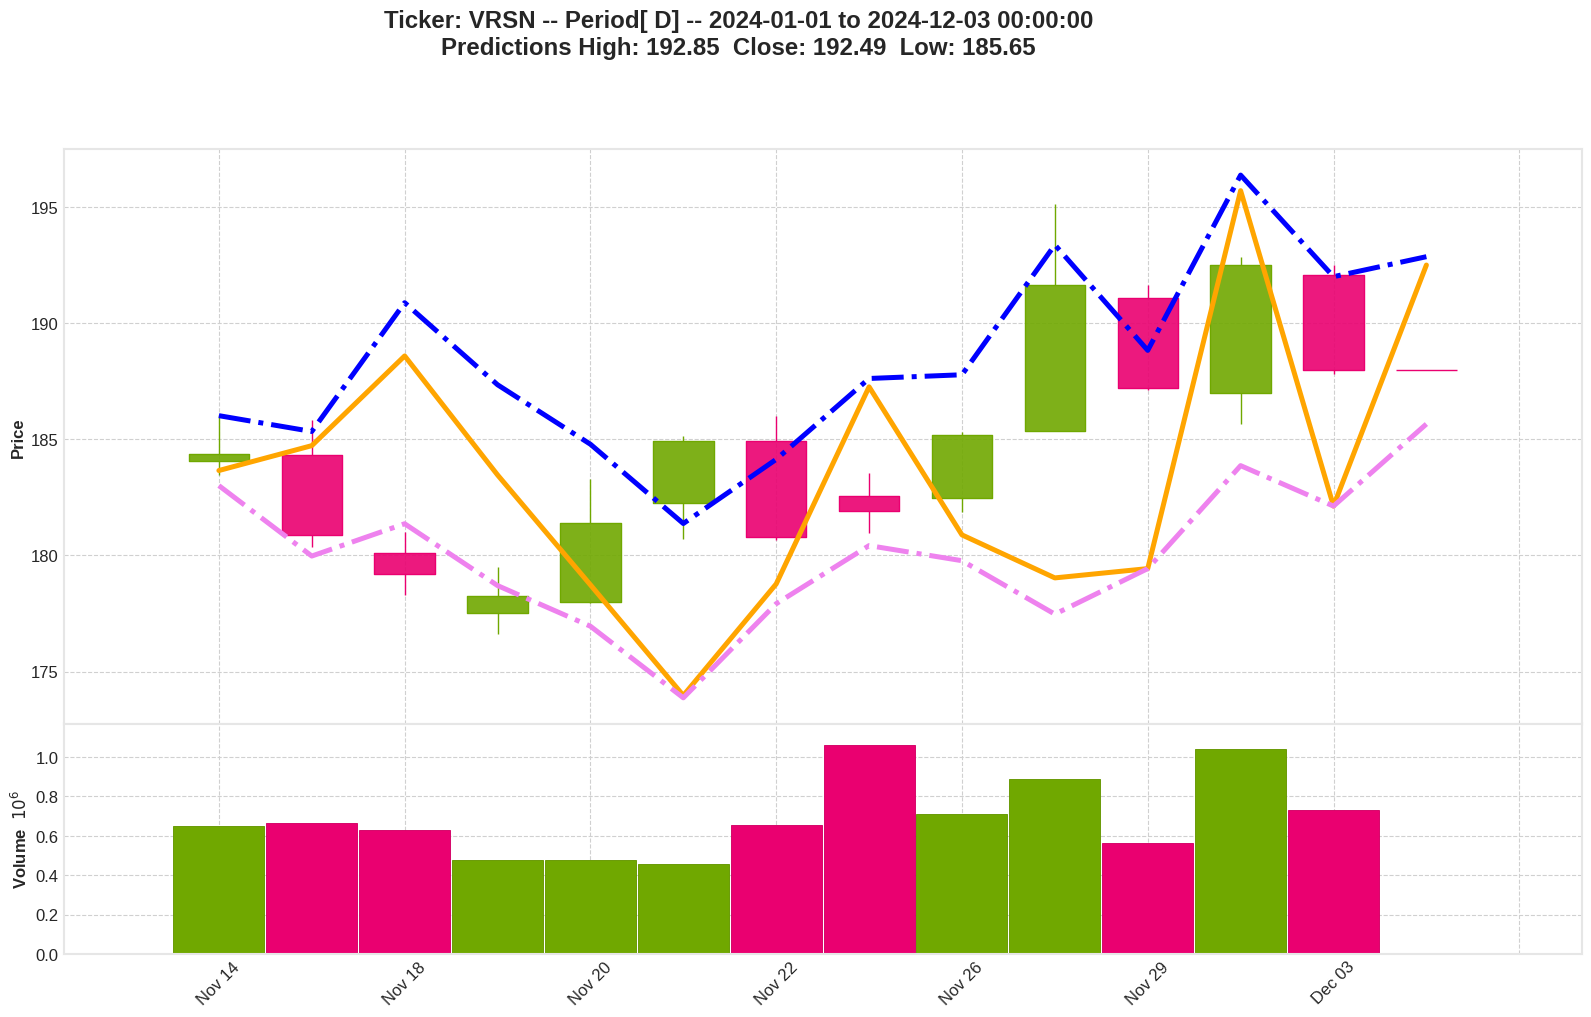

In [26]:

ppo.gen_prediction_chart(last_candles=100)
